In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
import yfinance as yf
import datetime as dt

stock="POWERGRID.NS"
start=dt.datetime(2000,1,1)
end=dt.datetime(2025,5,1)

df=yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2025-04-24,314.399994,315.850006,312.850006,314.899994,8021180
2025-04-25,306.500000,315.399994,303.399994,313.000000,11475773
2025-04-28,308.549988,310.950012,303.549988,304.200012,7314824
2025-04-29,302.950012,310.799988,301.200012,308.549988,14678005
2025-04-30,307.450012,310.000000,301.899994,304.450012,17619987


In [5]:
df.shape

(4329, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4329 entries, 2007-10-05 to 2025-04-30
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4329 non-null   float64
 1   (High, POWERGRID.NS)    4329 non-null   float64
 2   (Low, POWERGRID.NS)     4329 non-null   float64
 3   (Open, POWERGRID.NS)    4329 non-null   float64
 4   (Volume, POWERGRID.NS)  4329 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 202.9 KB


In [7]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [8]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4329.000000,4329.000000,4329.000000,4329.000000,4.329000e+03
mean,85.321808,86.432373,84.222658,85.357120,1.194113e+07
std,72.307119,73.176863,71.392243,72.287294,2.036156e+07
min,18.908405,20.212433,16.952364,20.114630,0.000000e+00
25%,36.558765,37.104608,36.044956,36.640397,4.877060e+06
50%,62.082008,63.348976,61.355342,62.175159,8.503695e+06
75%,85.016457,86.098475,84.081029,85.105941,1.378256e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [9]:
df=df.reset_index()

In [10]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [11]:
data01=df.to_csv('powergrid.csv')

In [12]:
data01=pd.read_csv('powergrid.csv')

In [13]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.38557815551758,35.250704510369104,26.767999775913133,28.908796765471156,855215656
2,1,2007-10-08,30.7276668548584,33.48011863436938,30.53451150138165,33.48011863436938,126671715
3,2,2007-10-09,32.82017135620117,33.109902182328575,29.085850801739035,30.74375909726689,116725709
4,3,2007-10-10,33.125999450683594,33.80204096867718,32.83626861907928,33.67327001215155,67931378


In [14]:
# candlesticks
import plotly.graph_objects as go

fig=go.Figure(data=[go.Candlestick(x=data01['Date'],open=data01['Open'],high=data01['High'],low=data01['Low'],close=data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()


In [15]:
df.drop(['Date'],axis=1,inplace=True)

<ipython-input-15-2e20541b3ad4>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [16]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.385578,35.250705,26.768000,28.908797,855215656
1,30.727667,33.480119,30.534512,33.480119,126671715
2,32.820171,33.109902,29.085851,30.743759,116725709
3,33.125999,33.802041,32.836269,33.673270,67931378
4,36.828125,38.630901,32.836267,38.630901,106320954


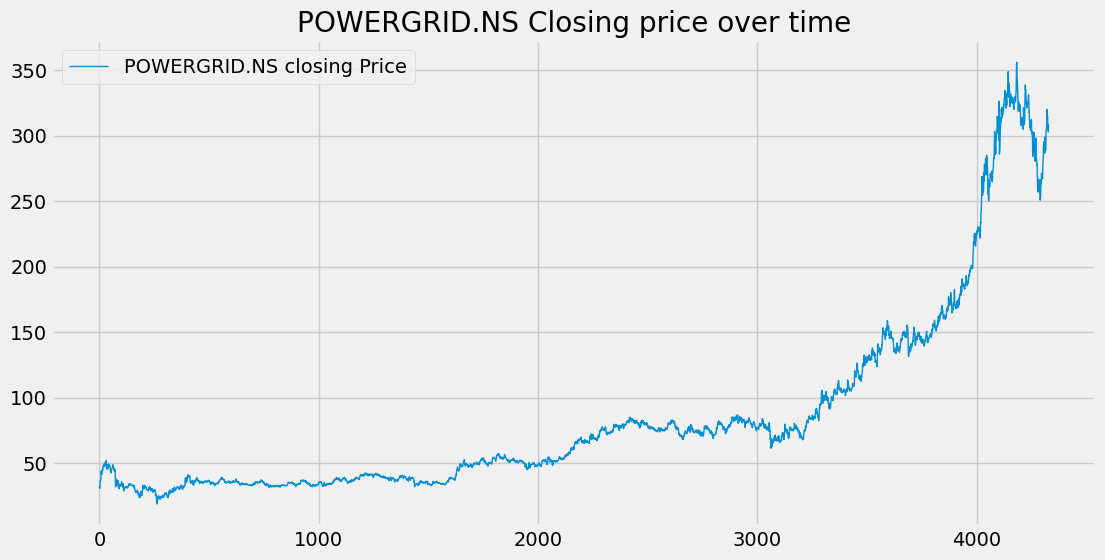

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label=f'{stock} closing Price',linewidth=1)
plt.title(f'{stock} Closing price over time')
plt.legend()
plt.show()

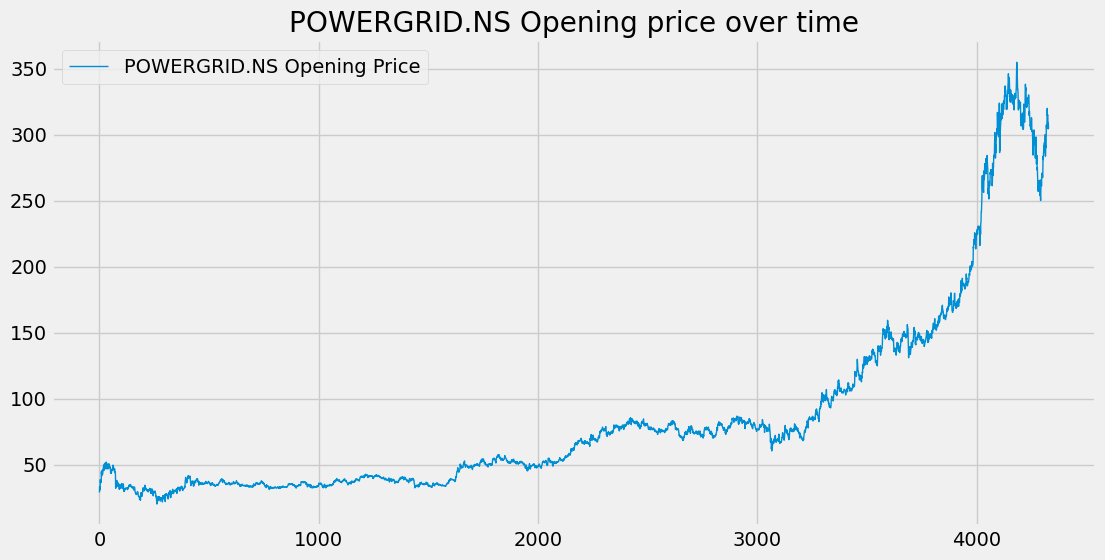

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df['Open'],label=f'{stock} Opening Price',linewidth=1)
plt.title(f'{stock} Opening price over time')
plt.legend()
plt.show()

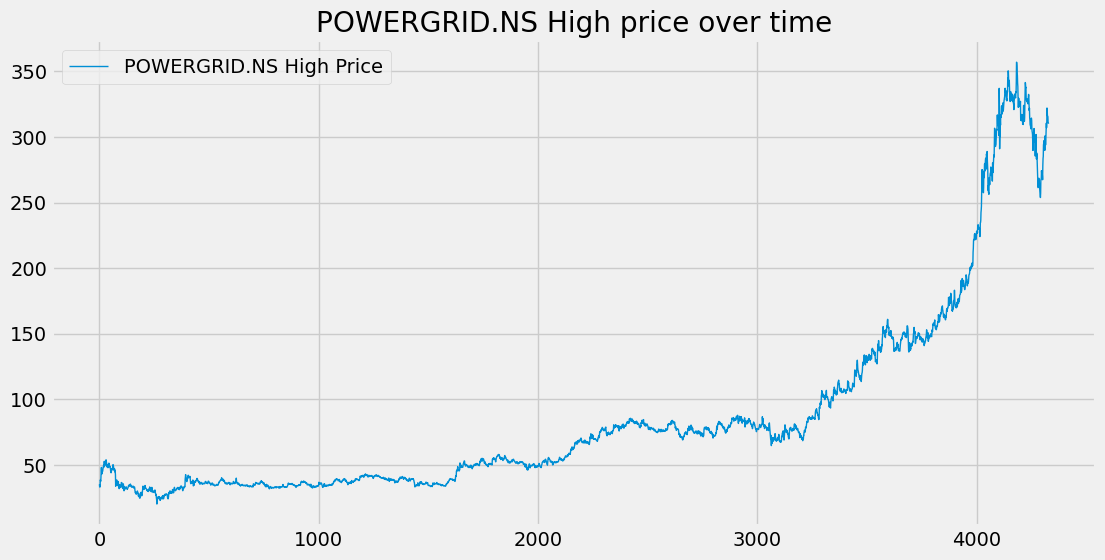

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df['High'],label=f'{stock} High Price',linewidth=1)
plt.title(f'{stock} High price over time')
plt.legend()
plt.show()

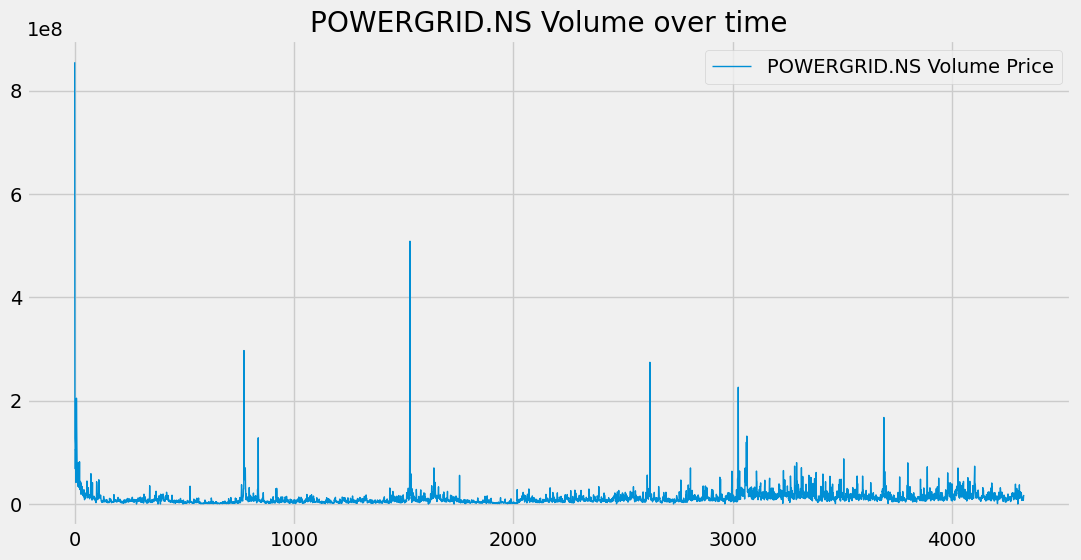

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df['Volume'],label=f'{stock} Volume Price',linewidth=1)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

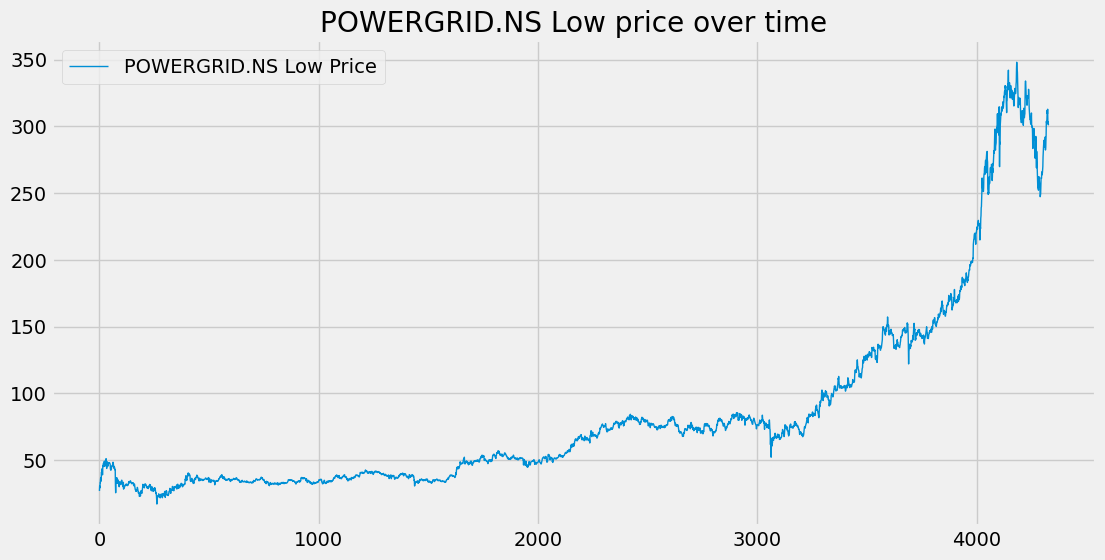

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df['Low'],label=f'{stock} Low Price',linewidth=1)
plt.title(f'{stock} Low price over time')
plt.legend()
plt.show()

In [22]:
# Moving Average
#[10,20,30,40,50,60,70,80,90]
#moving average for last 5 days ->null null null null 30.0 40.0 50.0

temp_data= [10,20,30,40,50,60,70,80,90]
print(sum(temp_data[2:7])/5)

50.0


In [23]:
import pandas as pd
df01=pd.DataFrame(temp_data)


In [24]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [25]:
ma100=df['Close'].rolling(100).mean()

In [26]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4324,292.321842
4325,292.088911
4326,291.918488
4327,291.707386


In [27]:
ma200=df['Close'].rolling(200).mean()

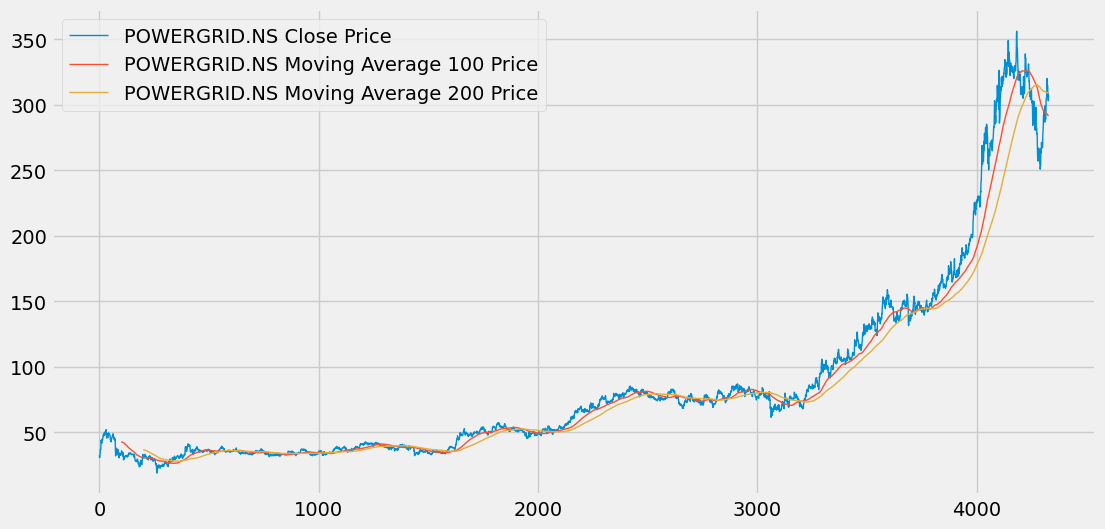

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,label=f'{stock} Close Price',linewidth=1)
plt.plot(ma100,label=f'{stock} Moving Average 100 Price',linewidth=1)
plt.plot(ma200,label=f'{stock} Moving Average 200 Price',linewidth=1)
plt.legend()
plt.show()

In [29]:
ema100=df.Close.ewm(span=100,adjust=False).mean()

In [30]:
ema200=df['Close'].ewm(span=200,adjust=False).mean()

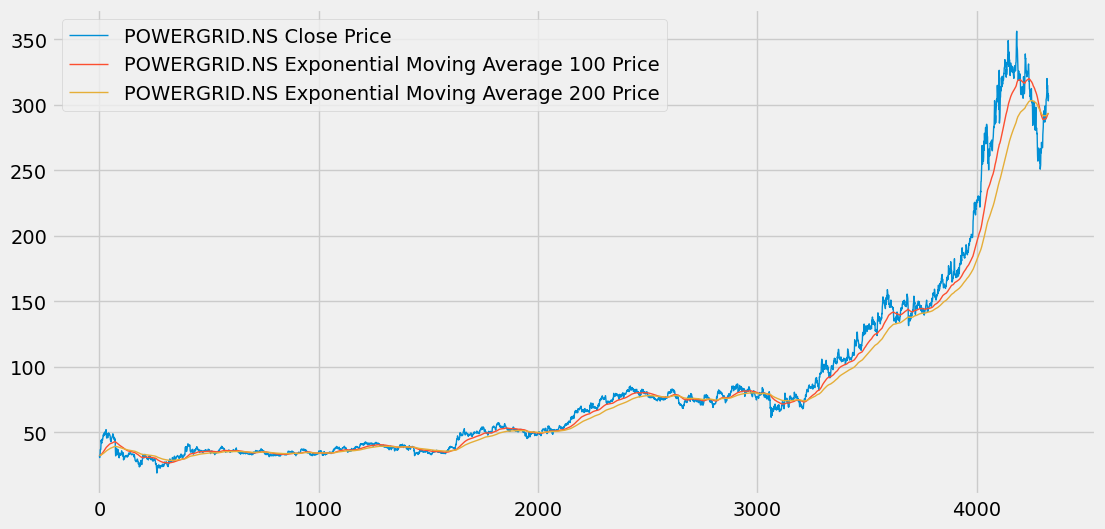

In [31]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,label=f'{stock} Close Price',linewidth=1)
plt.plot(ema100,label=f'{stock} Exponential Moving Average 100 Price',linewidth=1)
plt.plot(ema200,label=f'{stock} Exponential Moving Average 200 Price',linewidth=1)
plt.legend()
plt.show()

In [60]:
# Training & Testing
data_training = pd.DataFrame(df['Close'])[0:int(len(df)*0.70)]
data_testing = pd.DataFrame(df['Close'])[int(len(df)*0.70):int(len(df))]

In [61]:
data_training.shape

(3030, 1)

In [62]:
data_testing.shape

(1299, 1)

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [64]:
data_training_array=scaler.fit_transform(data_training)

In [65]:
data_training_array

array([[0.1980861 ],
       [0.17371829],
       [0.2044737 ],
       ...,
       [0.91227675],
       [0.88840635],
       [0.8729965 ]])

In [66]:
data_training_array.shape[0]

3030

In [67]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [68]:
x_train.shape

(2930, 100, 1)

In [69]:
# Model Building
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

LSTM Input -> 3D Array (batch_size,time_step,seq_len)
LSTM 2D or 3D
2D -> (batch_size, units)
3D -> (batch_size, time_step, units)


In [71]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [72]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(optimizer = 'adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 240ms/step - loss: 0.1389
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 256ms/step - loss: 0.0146
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 260ms/step - loss: 0.0101
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 253ms/step - loss: 0.0082
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 253ms/step - loss: 0.0075
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 255ms/step - loss: 0.0066
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - loss: 0.0066
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - loss: 0.0061
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 252ms/step - loss: 0.0064
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 254ms/step - loss: 0.0053
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - loss: 0.0051
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 252ms/step - loss: 0.0054
Epoch 13/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - loss: 0.0043
Epoch 14/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 240ms/step - loss: 0.0043
Epoch 15/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 44s 

In [74]:
past_100_days = data_training.tail(100)

In [75]:
final_df = pd.concat([past_100_days,data_testing],ignore_index = True)

In [76]:
final_df.head()

Ticker,POWERGRID.NS
0,81.018044
1,80.956367
2,81.963669
3,83.669983
4,83.423286


In [77]:
input_data = scaler.fit_transform(final_df)

In [78]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)

In [80]:
x_test.shape

(1299, 100, 1)

In [81]:
y_predicated = model.predict(x_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step


In [82]:
y_predicated.shape

(1299, 1)

In [83]:
scaler.scale_

array([0.00339369])

In [84]:
scale_factor = 1 / 0.0035166
y_predicated = y_predicated * scale_factor
y_test = y_test * scale_factor

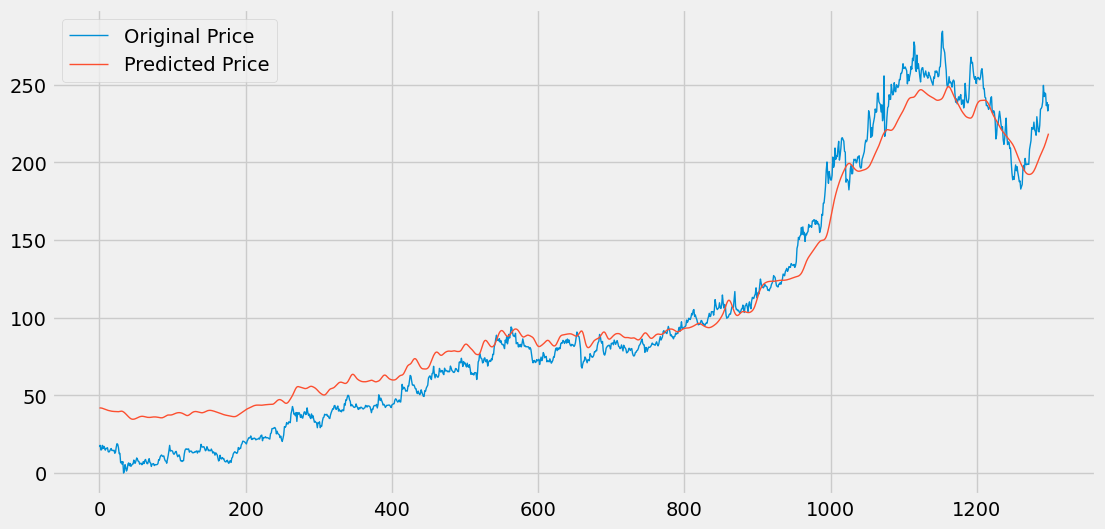

In [88]:
plt.figure(figsize=(12,6))
plt.plot(y_test,label='Original Price',linewidth=1)
plt.plot(y_predicated,label='Predicted Price',linewidth=1)
plt.legend()
plt.show()

In [87]:
model.save('stock_d1_model.h5')